# <div align="center"> SSD VOC TRAIN </div>

In [1]:
import os, json, time

from k12libs.utils.nb_easy import k12ai_post_cv_request
from k12libs.utils.nb_easy import k12ai_get_data
from k12libs.utils.nb_easy import k12ai_del_data
from k12libs.utils.nb_easy import k12ai_json_load
from k12libs.utils.nb_easy import k12ai_print
from k12libs.templates.det.voc import SSD_VOC_CONFIG

from PIL import Image

In [2]:
config = SSD_VOC_CONFIG

In [3]:
img = Image.open(os.path.join(config['data']['data_dir'], 'train', 'image', '000007.jpg'))

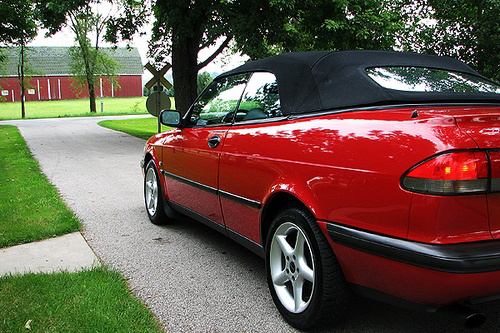

500 333


{'objects': [{'difficult': 0, 'bbox': [140, 49, 499, 329], 'label': 6}]}

In [16]:
display(img)
print(img.width, img.height)
k12ai_json_load(os.path.join(config['data']['data_dir'], 'train', 'json', '000007.json'))

In [4]:
k12ai_print(config['network'])

{
    "backbone": "vgg16",
    "model_name": "vgg16_ssd300",
    "num_feature_list": [
        512,
        1024,
        512,
        256,
        256,
        256
    ],
    "stride_list": [
        8,
        16,
        30,
        60,
        100,
        300
    ],
    "head_index_list": [
        0,
        1,
        2,
        3,
        4,
        5
    ]
}


In [5]:
k12ai_print(config['train']['aug_trans'])

{
    "shuffle_trans_seq": [
        "random_contrast",
        "random_hue",
        "random_saturation",
        "random_brightness",
        "random_perm"
    ],
    "trans_seq": [
        "random_hflip",
        "random_pad",
        "random_det_crop"
    ],
    "random_saturation": {
        "ratio": 0.5,
        "lower": 0.5,
        "upper": 1.5
    },
    "random_hue": {
        "ratio": 0.5,
        "delta": 18
    },
    "random_contrast": {
        "ratio": 0.5,
        "lower": 0.5,
        "upper": 1.5
    },
    "random_pad": {
        "ratio": 0.6,
        "up_scale_range": [
            1.0,
            4.0
        ]
    },
    "random_brightness": {
        "ratio": 0.5,
        "shift_value": 32
    },
    "random_perm": {
        "ratio": 0.5
    },
    "random_hflip": {
        "ratio": 0.5,
        "swap_pair": []
    },
    "random_det_crop": {
        "ratio": 1.0
    }
}


In [6]:
config['solver']['max_epoch'] = 2
config['train']['batch_size'] = 2
config['network']['model_name'] = 'vgg16_ssd300'
config['train']['aug_trans']['shuffle_trans_seq'] = ["random_saturation"]
config['train']['aug_trans']['trans_seq'] = ["random_resized_crop"]
config['train']['aug_trans']['random_resized_crop'] = {
    "crop_size": [224, 224],
    "scale_range": [0.08, 1.0],
    "aspect_range": [0.75, 1.33]
}

## Train

In [9]:
result = k12ai_post_cv_request(
    uri='k12ai/framework/train',
    op='train.stop',
    user='test',
    uuid='ssd_voc'
)
k12ai_print(result)

{
    "req": {
        "op": "train.stop",
        "user": "test",
        "service_name": "k12cv",
        "service_uuid": "ssd_voc",
        "service_params": {}
    },
    "res": {
        "code": 100000,
        "descr": "success"
    },
    "key": "framework/test/ssd_voc/train.stop"
}


In [15]:
result = k12ai_post_cv_request(
    uri='k12ai/framework/train',
    op='train.start',
    user='test',
    uuid='ssd_voc',
    params=config
)
k12ai_del_data(result['key'])

k12ai_print(result)

{
    "req": {
        "op": "train.start",
        "user": "test",
        "service_name": "k12cv",
        "service_uuid": "ssd_voc",
        "service_params": {
            "dataset": "default",
            "task": "det",
            "method": "single_shot_detector",
            "data": {
                "num_classes": 21,
                "data_dir": "/data/datasets/cv/VOC07+12_DET",
                "image_tool": "cv2",
                "input_mode": "BGR",
                "keep_difficult": false,
                "workers": 1,
                "mean_value": [
                    104,
                    117,
                    123
                ],
                "normalize": {
                    "div_value": 1,
                    "mean": [
                        104.0,
                        117.0,
                        123.0
                    ],
                    "std": [
                        1.0,
                        1.0,
                        1.0
             

In [16]:
k12ai_print(k12ai_get_data(result['key'], 'status', waitcnt=5))

[
    {
        "key": "framework/test/ssd_voc/train.start/status",
        "value": {
            "version": "0.1.0",
            "type": "status",
            "tag": "framework",
            "op": "train.start",
            "user": "test",
            "service_uuid": "ssd_voc",
            "timestamp": 1576845919247,
            "datetime": "20191220204519",
            "status": {
                "value": "running"
            }
        }
    }
]


In [17]:
k12ai_print(k12ai_get_data(result['key'], 'error', waitcnt=5))

In [19]:
k12ai_print(k12ai_get_data(result['key'], 'metrics', waitcnt=100))

[
    {
        "key": "framework/test/ssd_voc/train.start/metrics/201912202046",
        "value": {
            "version": "0.1.0",
            "type": "metrics",
            "tag": "framework",
            "op": "train.start",
            "user": "test",
            "service_uuid": "ssd_voc",
            "timestamp": 1576845989840,
            "datetime": "20191220204629",
            "metrics": {
                "training_epochs": 1,
                "training_loss": 13.17955685,
                "training_speed": 0.092,
                "lr": [
                    0.0004,
                    0.001
                ]
            }
        }
    }
]
